In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
# Read in the data
# Note: The following data has been normalized between 0 and 1
data = Path('loans.csv')
df = pd.read_csv(data)
df.head()

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve


In [12]:
#EDA look at results of the applications
df["status"].value_counts()

deny       53
approve    47
Name: status, dtype: int64

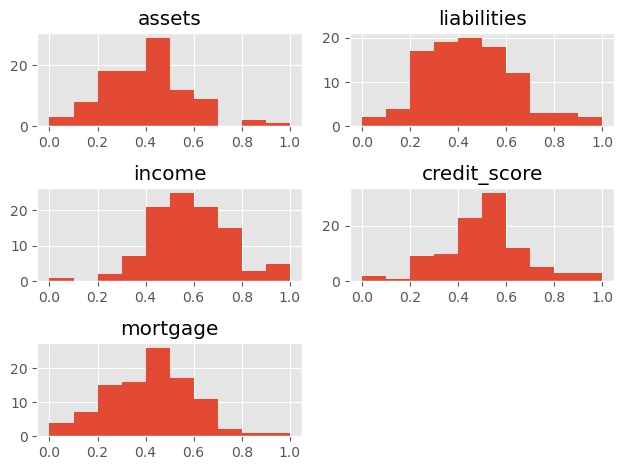

In [11]:
#EDA look at the data
df.hist()
plt.tight_layout()

In [3]:
# Segment the features from the target
y = df["status"]
X = df.drop(columns="status")

In [4]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(75, 5)

In [5]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [6]:
# Fit the data
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Score the accuracy
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6133333333333333
Testing Data Score: 0.6


In [8]:
# Make predictions using the test data
predictions = classifier.predict(X_test)
results = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,approve,deny
1,deny,approve
2,deny,deny
3,approve,deny
4,deny,deny


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[7, 5],
       [5, 8]])

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     approve       0.58      0.58      0.58        12
        deny       0.62      0.62      0.62        13

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.60      0.60      0.60        25

